# Import Python Packages & Libraries

In [1]:
import geopandas as gpd
import matplotlib.colors as colors
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from astropy.modeling import models, fitting
from scipy import stats
import statsmodels.api as sm
import pylab as py
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from IPython.display import display_html 
from shapely.geometry import Point, Polygon

class BOLD:
   B_start = '\033[1m'
   B_end = '\033[0m'
class UNDERLINE:
    U_start = '\033[4m'
    U_end = '\033[0m'

# Carbon Monoxide (CO) 

### Line Plots (2016, 2017, 2018)

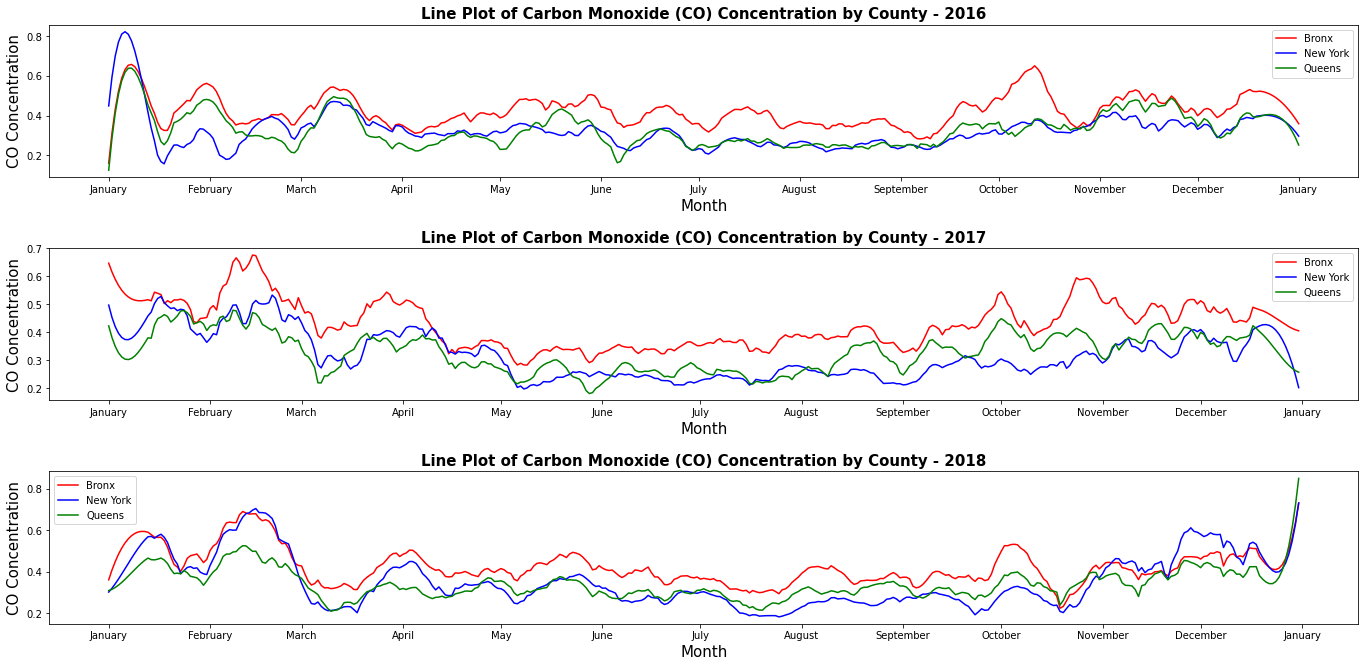

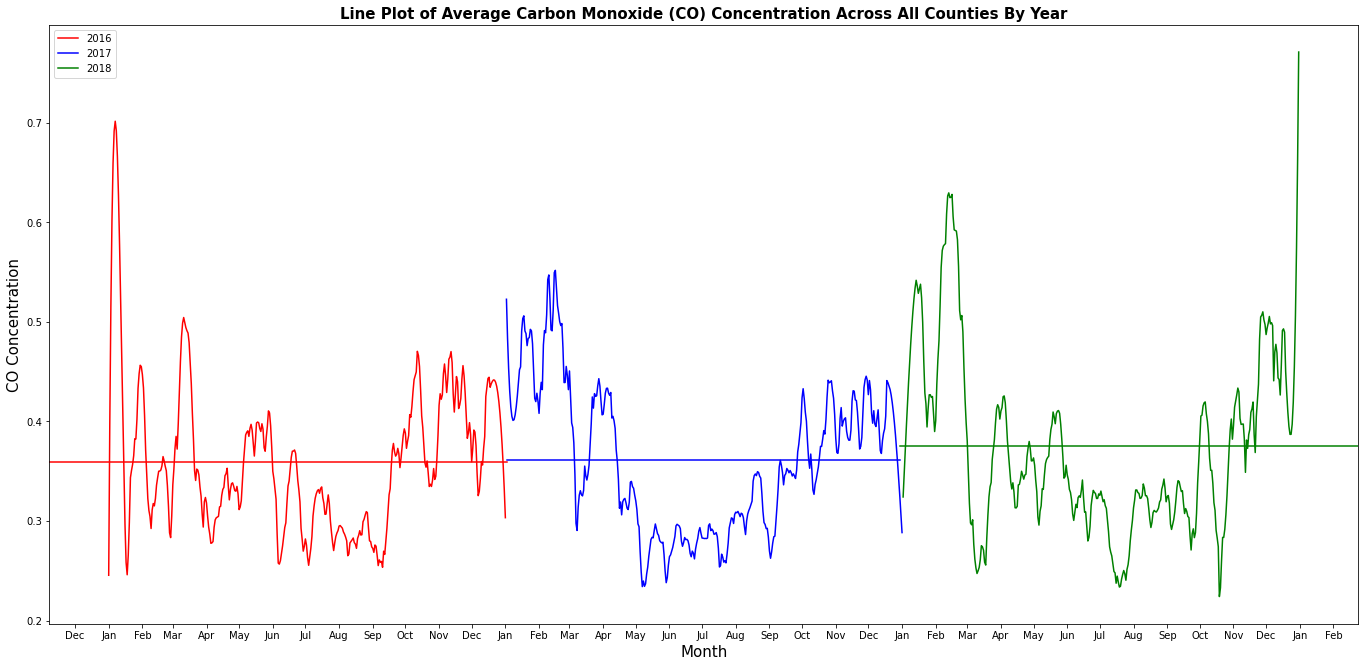

In [2]:
CO_2016 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/CO/CO.2016.All_Sites_NEW.csv")
CO_2017 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/CO/CO.2017.All_Sites_NEW.csv")
CO_2018 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/CO/CO.2018.All_Sites_NEW.csv")

# Bronx CO (2016, 2017, 2018)
BRONX_CO_2016 = CO_2016[CO_2016["COUNTY"] == "Bronx"]
BRONX_CO_2017 = CO_2017[CO_2017["COUNTY"] == "Bronx"]
BRONX_CO_2018 = CO_2018[CO_2018["COUNTY"] == "Bronx"]

BRONX_COMBINED = pd.DataFrame()
BRONX_COMBINED = pd.concat([BRONX_CO_2016.reset_index(drop = True, inplace = False),
                BRONX_CO_2017.reset_index(drop = True, inplace = False),
                BRONX_CO_2018.reset_index(drop = True, inplace = False)],
               axis = 0, ignore_index = True)

# New York CO (2016, 2017, 2018)
NY_CO_2016 = CO_2016[CO_2016["COUNTY"] == "New York"]
NY_CO_2017 = CO_2017[CO_2017["COUNTY"] == "New York"]
NY_CO_2018 = CO_2018[CO_2018["COUNTY"] == "New York"]

NY_COMBINED = pd.DataFrame()
NY_COMBINED = pd.concat([NY_CO_2016.reset_index(drop = True, inplace = False),
                NY_CO_2017.reset_index(drop = True, inplace = False),
                NY_CO_2018.reset_index(drop = True, inplace = False)],
               axis = 0, ignore_index = True)

# Queens CO (2016, 2017, 2018)
QUEENS_CO_2016 = CO_2016[CO_2016["COUNTY"] == "Queens"]
QUEENS_CO_2017 = CO_2017[CO_2017["COUNTY"] == "Queens"]
QUEENS_CO_2018 = CO_2018[CO_2018["COUNTY"] == "Queens"]

QUEENS_COMBINED = pd.DataFrame()
QUEENS_COMBINED = pd.concat([QUEENS_CO_2016.reset_index(drop = True, inplace = False),
                QUEENS_CO_2017.reset_index(drop = True, inplace = False),
                QUEENS_CO_2018.reset_index(drop = True, inplace = False)],
               axis = 0, ignore_index = True)

CO_2016_MEAN = CO_2016.groupby(CO_2016["DATE"])["AQI_CONC"].mean()
CO_2017_MEAN = CO_2017.groupby(CO_2017["DATE"])["AQI_CONC"].mean()
CO_2018_MEAN = CO_2018.groupby(CO_2018["DATE"])["AQI_CONC"].mean()

# Line Plot Overlaying Each County for Carbon Monoxide in 2016
fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["Bronx","New York","Queens"]

# 2016
smoothed = savgol_filter(BRONX_CO_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(BRONX_CO_2016["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_CO_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(NY_CO_2016["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_CO_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(QUEENS_CO_2016["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax1.set_title("Line Plot of Carbon Monoxide (CO) Concentration by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("CO Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)

# 2017
smoothed = savgol_filter(BRONX_CO_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(BRONX_CO_2017["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_CO_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(NY_CO_2017["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_CO_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(QUEENS_CO_2017["DATE"], smoothed, color = "green")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax2.set_title("Line Plot of Carbon Monoxide (CO) Concentration by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("CO Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
ax2.legend(labels = legend_labels)

# 2018
smoothed = savgol_filter(BRONX_CO_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(BRONX_CO_2018["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_CO_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(NY_CO_2018["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_CO_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(QUEENS_CO_2018["DATE"], smoothed, color = "green")
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax3.set_title("Line Plot of Carbon Monoxide (CO) Concentration by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("CO Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
ax3.legend(labels = legend_labels)
plt.show()

# Averaged By Year (2016, 2017, 2018)
CO_2016_MEAN = CO_2016.groupby(CO_2016["DATE"])["AQI_CONC"].mean().reset_index()
CO_2017_MEAN = CO_2017.groupby(CO_2017["DATE"])["AQI_CONC"].mean().reset_index()
CO_2018_MEAN = CO_2018.groupby(CO_2018["DATE"])["AQI_CONC"].mean().reset_index()

# Averaged By Year (2016, 2017, 2018)
fig, ax1  = plt.subplots(1, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["2016","2017","2018"]

# Averaged By Year (2016, 2017, 2018)
smoothed = savgol_filter(CO_2016_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(CO_2016_MEAN["DATE"], smoothed, color = "red")
smoothed = savgol_filter(CO_2017_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(CO_2017_MEAN["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(CO_2018_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(CO_2018_MEAN["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.set_title("Line Plot of Average Carbon Monoxide (CO) Concentration Across All Counties By Year", fontweight = "bold", size = 15)
ax1.set_ylabel("CO Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)
ax1.axhline(y = CO_2016_MEAN["AQI_CONC"].mean(), color = "red", linestyle = '-', xmax = 0.35)
ax1.axhline(y = CO_2017_MEAN["AQI_CONC"].mean(), color = "blue", linestyle = '-', xmin = 0.35, xmax = 0.65)
ax1.axhline(y = CO_2018_MEAN["AQI_CONC"].mean(), color = "green", linestyle = '-', xmin = 0.65, xmax = 1)

plt.show()

### Descriptive Statistics

In [3]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Carbon Monoxide (CO); Bronx"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(BRONX_CO_2016["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_CO_2017["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_CO_2018["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_COMBINED["AQI_CONC"].describe())], 
                     ["Bronx - 2016",
                      "Bronx - 2017",
                      "Bronx - 2018",
                      "Bronx - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Carbon Monoxide (CO); New York"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(NY_CO_2016["AQI_CONC"].describe()),
                      pd.DataFrame(NY_CO_2017["AQI_CONC"].describe()),
                      pd.DataFrame(NY_CO_2018["AQI_CONC"].describe()),
                      pd.DataFrame(NY_COMBINED["AQI_CONC"].describe())], 
                     ["New York - 2016",
                      "New York - 2017",
                      "New York - 2018",
                      "New York - Combined"])
print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Carbon Monoxide (CO); Queens"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(QUEENS_CO_2016["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_CO_2017["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_CO_2018["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_COMBINED["AQI_CONC"].describe())], 
                     ["Queens - 2016",
                      "Queens - 2017",
                      "Queens - 2018",
                      "Queens - Combined"])

Descriptive Stats - Carbon Monoxide (CO); Bronx


,AQI_CONC
count,366.000000
mean,0.424863
std,0.164223
min,0.200000
25%,0.300000
50%,0.400000
75%,0.500000
max,1.100000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Carbon Monoxide (CO); New York


,AQI_CONC
count,366.000000
mean,0.324044
std,0.156051
min,0.000000
25%,0.200000
50%,0.300000
75%,0.400000
max,1.500000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Carbon Monoxide (CO); Queens


,AQI_CONC
count,366.000000
mean,0.329235
std,0.166981
min,0.100000
25%,0.200000
50%,0.300000
75%,0.400000
max,1.200000
,AQI_CONC
count,365.000000


### Box Plots (2016, 2017, 2018)

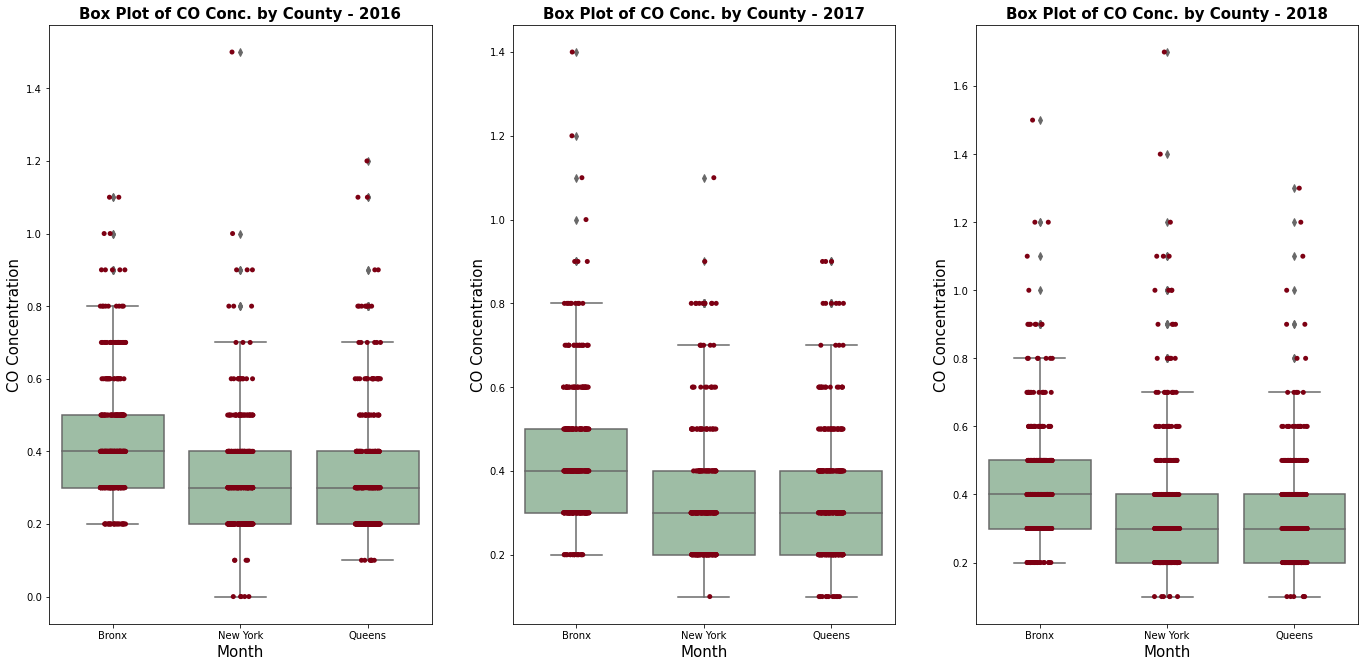

_________________________________________________________________________________


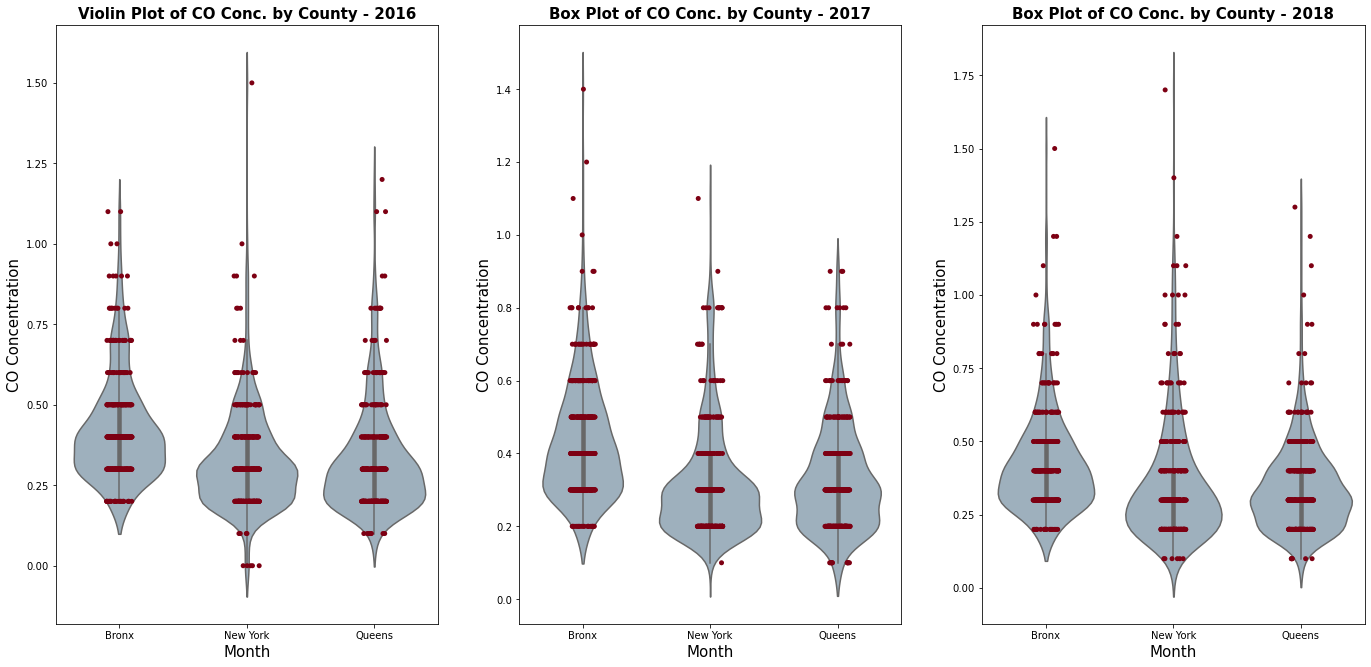

In [4]:
# Box Plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = CO_2016, color = "#99c2a2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = CO_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of CO Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("CO Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = CO_2017, color = "#99c2a2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = CO_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of CO Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("CO Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = CO_2018, color = "#99c2a2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = CO_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of CO Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("CO Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# Violin Plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = CO_2016, color = "#99b1c2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = CO_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Violin Plot of CO Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("CO Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = CO_2017, color = "#99b1c2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = CO_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of CO Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("CO Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = CO_2018, color = "#99b1c2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = CO_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of CO Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("CO Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()


### T-Tests & ANOVA Tests (2016, 2017, 2018)

In [5]:
# T-Test comparison by variables

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Carbon Monoxide (CO) 2016"+UNDERLINE.U_end+BOLD.B_end)
print("New York vs. Bronx - Carbon Monoxide 2016")
fvalue, pvalue = stats.ttest_ind(NY_CO_2016["AQI_CONC"],BRONX_CO_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - Carbon Monoxide 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_CO_2016["AQI_CONC"],BRONX_CO_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - Carbon Monoxide 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_CO_2016["AQI_CONC"],NY_CO_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Carbon Monoxide 2016"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_CO_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_CO_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_CO_2016["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Carbon Monoxide (CO) 2017"+UNDERLINE.U_end+BOLD.B_end)
print("New York vs. Bronx - Carbon Monoxide 2017")
fvalue, pvalue = stats.ttest_ind(NY_CO_2017["AQI_CONC"],BRONX_CO_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - Carbon Monoxide 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_CO_2017["AQI_CONC"],BRONX_CO_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - Carbon Monoxide 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_CO_2017["AQI_CONC"],NY_CO_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Carbon Monoxide 2017"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_CO_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_CO_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_CO_2017["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Carbon Monoxide (CO) 2018"+UNDERLINE.U_end+BOLD.B_end)
print("New York vs. Bronx - Carbon Monoxide 2018")
fvalue, pvalue = stats.ttest_ind(NY_CO_2018["AQI_CONC"],BRONX_CO_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - Carbon Monoxide 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_CO_2018["AQI_CONC"],BRONX_CO_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - Carbon Monoxide 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_CO_2018["AQI_CONC"],NY_CO_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Carbon Monoxide 2018"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_CO_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_CO_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_CO_2018["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Carbon Monoxide (CO) All Years"+UNDERLINE.U_end+BOLD.B_end)
print("2016 vs. 2017 - Carbon Monoxide (CO)")
fvalue, pvalue = stats.ttest_ind(CO_2016_MEAN["AQI_CONC"],CO_2017_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2016 vs. 2018 - Carbon Monoxide (CO)")
fvalue, pvalue = stats.ttest_ind(CO_2016_MEAN["AQI_CONC"],CO_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2017 vs. 2018 - Carbon Monoxide (CO)")
fvalue, pvalue = stats.ttest_ind(CO_2017_MEAN["AQI_CONC"],CO_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")


T-Test - Carbon Monoxide (CO) 2016
New York vs. Bronx - Carbon Monoxide 2016
t-Value: -8.5141 p-Value: 9.524771451252716e-17


Queens vs. Bronx - Carbon Monoxide 2016
t-Value: -7.8115 p-Value: 1.9693472313081433e-14


Queens vs. NY - Carbon Monoxide 2016
t-Value: 0.4345 p-Value: 0.6640215168620733


ANOVA - Carbon Monoxide 2016
                    sum_sq     df             F        PR(>F)
Bronx         3.149520e+00    1.0  1.399999e+31  0.000000e+00
Queens        7.379156e-30    1.0  3.280124e+01  2.160343e-08
NY            1.650507e-29    1.0  7.336702e+01  3.217247e-16
Bronx:NY      3.941943e-31    1.0  1.752241e+00  1.864375e-01
Bronx:Queens  1.347080e-30    1.0  5.987934e+00  1.488279e-02
Queens:NY     7.467770e-31    1.0  3.319513e+00  6.929401e-02
Residual      8.076272e-29  359.0           NaN           NaN
_________________________________________________________________________________


T-Test - Carbon Monoxide (CO) 2017
New York vs. Bronx - Carbon Monoxide 2017
t-Value: -9.5

### Histograms w/Curve Fitting (2016, 2017, 2018)

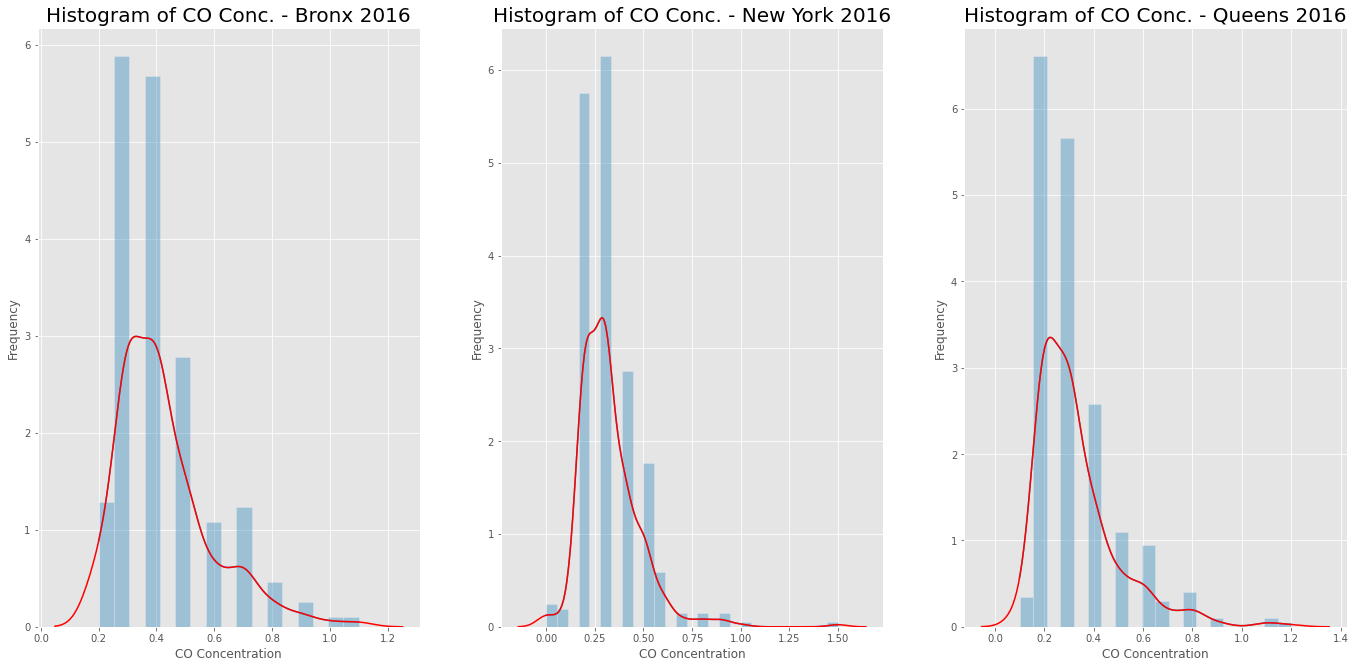

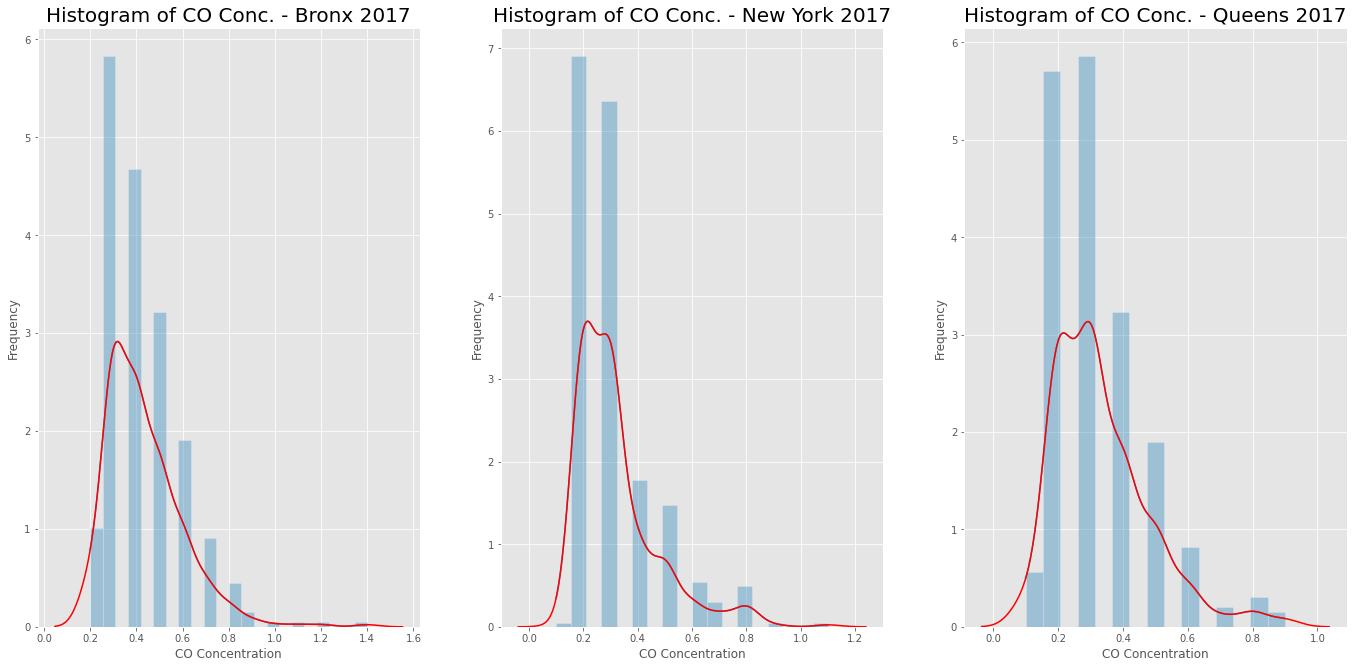

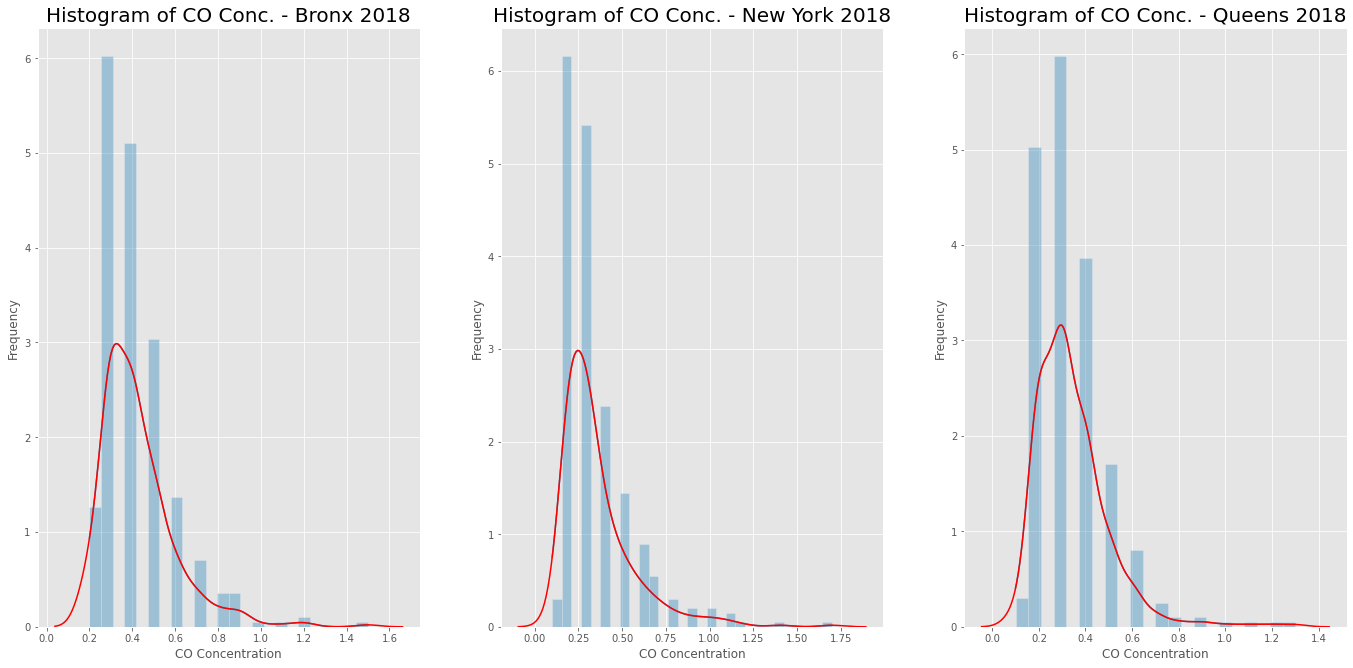



Shapiro-Wilk Test for Normality


,AQI,County,Year,Statistic,p-Value
0,CO,Bronx,2016,0.862219,1.770528e-17
1,CO,New York,2016,0.804744,1.087918e-20
2,CO,Queens,2016,0.787313,1.600177e-21
3,CO,Bronx,2017,0.859141,1.199219e-17
4,CO,New York,2017,0.763167,1.453088e-22
5,CO,Queens,2017,0.866269,3.423819e-17
6,CO,Bronx,2018,0.821059,7.860292e-20
7,CO,New York,2018,0.753323,5.616106e-23
8,CO,Queens,2018,0.805414,1.253112e-20


D’Agostino and Pearson Test for Normality


,AQI,County,Year,Statistic,p-Value
0,CO,Bronx,2016,88.536577,5.950132e-20
1,CO,New York,2016,204.388345,4.146052e-45
2,CO,Queens,2016,153.853102,3.901426e-34
3,CO,Bronx,2017,128.633242,1.168548e-28
4,CO,New York,2017,139.990452,3.994474e-31
5,CO,Queens,2017,83.189880,8.620791e-19
6,CO,Bronx,2018,165.409743,1.207065e-36
7,CO,New York,2018,198.084950,9.691693e-44
8,CO,Queens,2018,185.918004,4.250288e-41


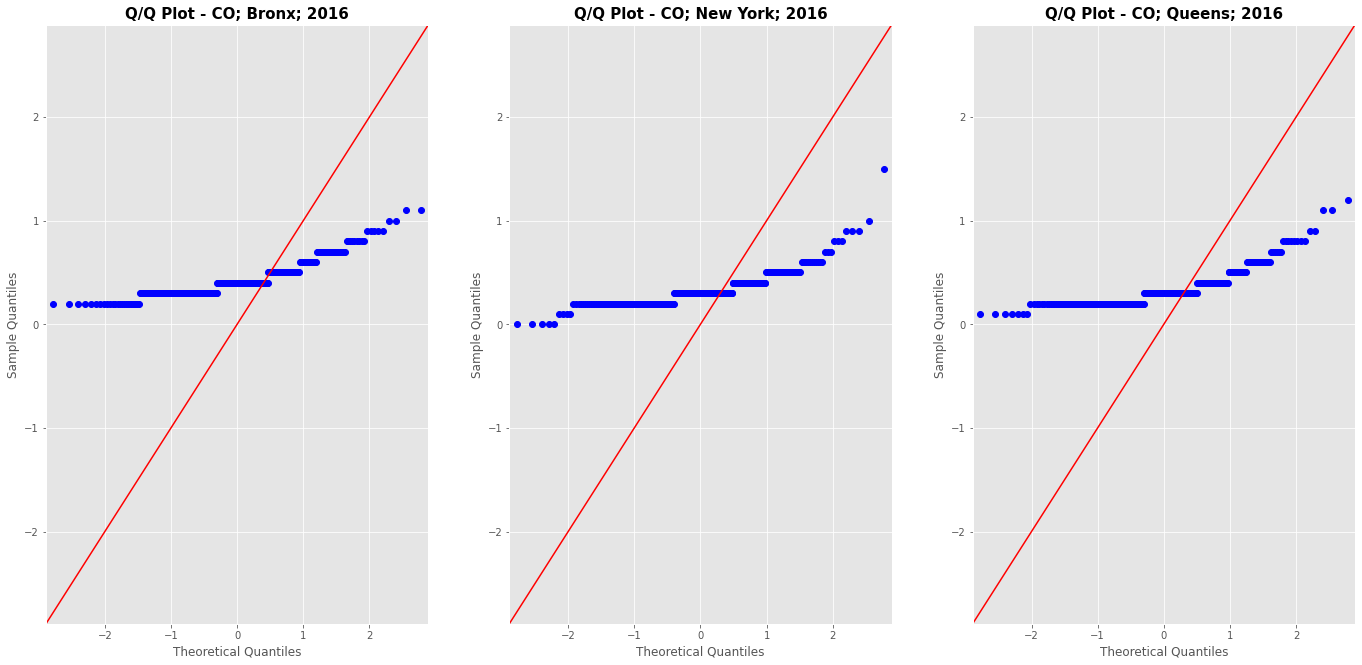

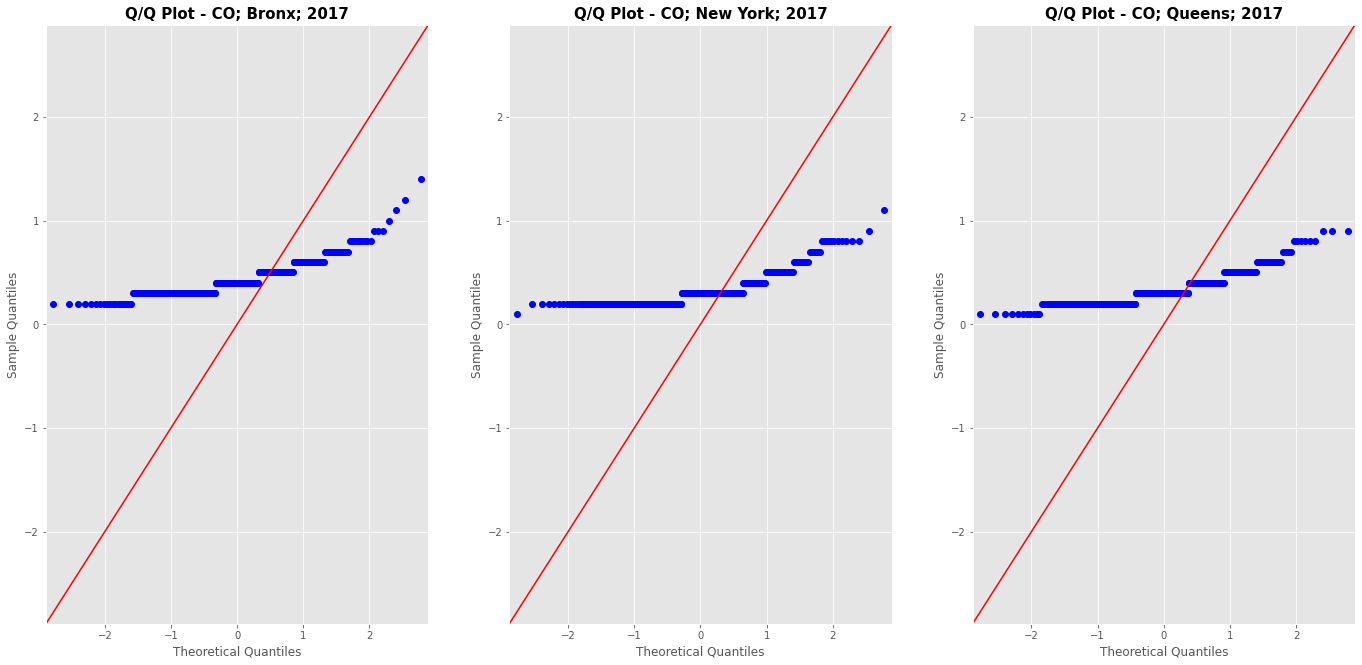

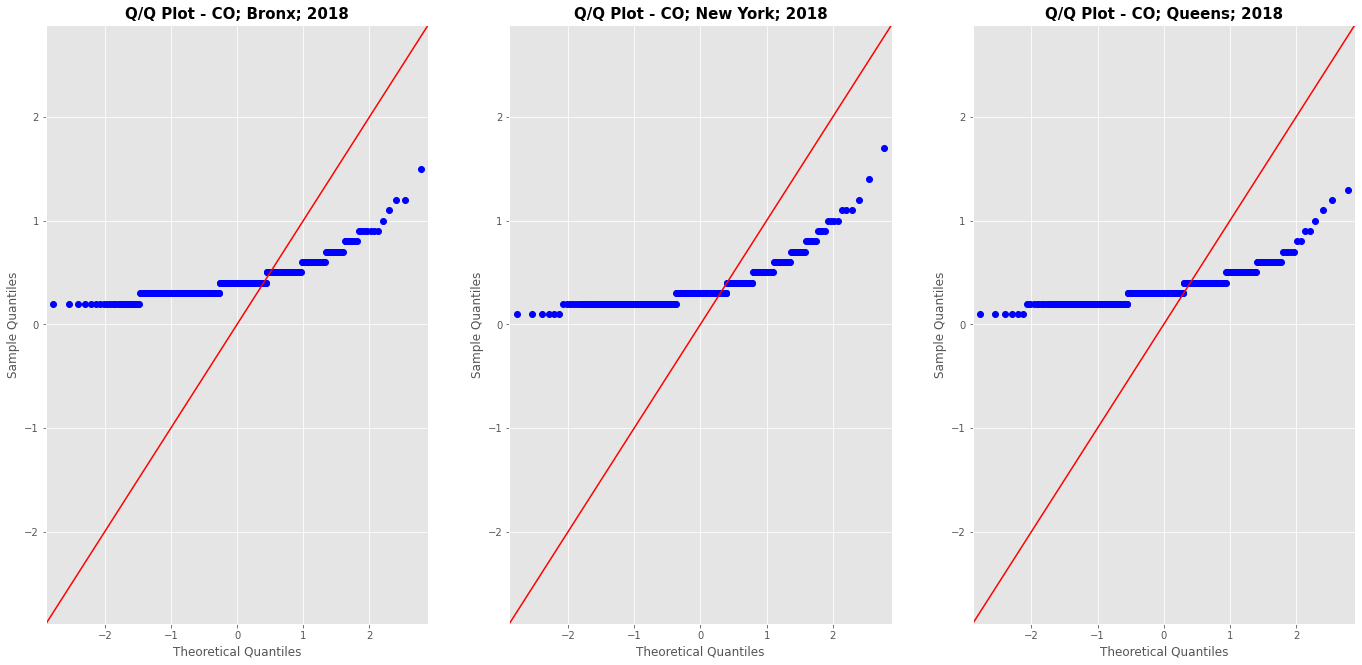

In [6]:
# 2016
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Carbon Monoxide (CO) Concentration for Bronx County w/Curve Fit - 2016"
sns.histplot(BRONX_CO_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_CO_2016, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("CO Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of CO Conc. - Bronx 2016", fontsize = 20)

# "Histogram of Carbon Monoxide (CO) Concentration for New York County w/Curve Fit - 2016"
sns.histplot(NY_CO_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_CO_2016, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("CO Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of CO Conc. - New York 2016", fontsize = 20)

# "Histogram of Carbon Monoxide (CO) Concentration for Queens County w/Curve Fit - 2016"
sns.histplot(QUEENS_CO_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_CO_2016, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("CO Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of CO Conc. - Queens 2016", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2017
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Carbon Monoxide (CO) Concentration for Bronx County w/Curve Fit - 2017"
sns.histplot(BRONX_CO_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_CO_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("CO Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of CO Conc. - Bronx 2017", fontsize = 20)

# "Histogram of Carbon Monoxide (CO) Concentration for New York County w/Curve Fit - 2017"
sns.histplot(NY_CO_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_CO_2017, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("CO Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of CO Conc. - New York 2017", fontsize = 20)

# "Histogram of Carbon Monoxide (CO) Concentration for Queens County w/Curve Fit - 2017"
sns.histplot(QUEENS_CO_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_CO_2017, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("CO Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of CO Conc. - Queens 2017", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2018
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Carbon Monoxide (CO) Concentration for Bronx County w/Curve Fit - 2018"
sns.histplot(BRONX_CO_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_CO_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("CO Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of CO Conc. - Bronx 2018", fontsize = 20)

# "Histogram of Carbon Monoxide (CO) Concentration for New York County w/Curve Fit - 2018"
sns.histplot(NY_CO_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_CO_2018, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("CO Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of CO Conc. - New York 2018", fontsize = 20)

# "Histogram of Carbon Monoxide (CO) Concentration for Queens County w/Curve Fit - 2018"
sns.histplot(QUEENS_CO_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_CO_2018, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("CO Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of CO Conc. - Queens 2018", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# H0 = Data was pulled from a normal distribution
# HT = Data was NOT pulled from a normal distribution
# The Shapiro-Wilk test rejects the null hypothesis of normality when the p-value is less than or equal to 0.05

shapiro_df = pd.DataFrame({})
print(BOLD.B_start+UNDERLINE.U_start+"Shapiro-Wilk Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
shapiro_df = shapiro_df.append([{"AQI":"CO","County":"Bronx","Year":2016,"Statistic":stats.shapiro(BRONX_CO_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_CO_2016["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"New York","Year":2016,"Statistic":stats.shapiro(NY_CO_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_CO_2016["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"Queens","Year":2016,"Statistic":stats.shapiro(QUEENS_CO_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_CO_2016["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"Bronx","Year":2017,"Statistic":stats.shapiro(BRONX_CO_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_CO_2017["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"New York","Year":2017,"Statistic":stats.shapiro(NY_CO_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_CO_2017["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"Queens","Year":2017,"Statistic":stats.shapiro(QUEENS_CO_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_CO_2017["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"Bronx","Year":2018,"Statistic":stats.shapiro(BRONX_CO_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_CO_2018["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"New York","Year":2018,"Statistic":stats.shapiro(NY_CO_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_CO_2018["AQI_CONC"]).pvalue},
                {"AQI":"CO","County":"Queens","Year":2018,"Statistic":stats.shapiro(QUEENS_CO_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_CO_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(shapiro_df)

###############################################################################################################

# D’Agostino and Pearson Test for Normality
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

normality_df = pd.DataFrame()
print(BOLD.B_start+UNDERLINE.U_start+"D’Agostino and Pearson Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
normality_df = normality_df.append([{"AQI":"CO","County":"Bronx","Year":2016,"Statistic":stats.normaltest(BRONX_CO_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_CO_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"New York","Year":2016,"Statistic":stats.normaltest(NY_CO_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_CO_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"Queens","Year":2016,"Statistic":stats.normaltest(QUEENS_CO_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_CO_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"Bronx","Year":2017,"Statistic":stats.normaltest(BRONX_CO_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_CO_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"New York","Year":2017,"Statistic":stats.normaltest(NY_CO_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_CO_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"Queens","Year":2017,"Statistic":stats.normaltest(QUEENS_CO_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_CO_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"Bronx","Year":2018,"Statistic":stats.normaltest(BRONX_CO_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_CO_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"New York","Year":2018,"Statistic":stats.normaltest(NY_CO_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_CO_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"CO","County":"Queens","Year":2018,"Statistic":stats.normaltest(QUEENS_CO_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_CO_2018["AQI_CONC"]).pvalue}])
display(normality_df)
print("\n")
###############################################################################################################

# Q/Q Plot
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

#2016
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_CO_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - CO; Bronx; 2016", fontweight = "bold", size = 15)
sm.qqplot(NY_CO_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - CO; New York; 2016", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_CO_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - CO; Queens; 2016", fontweight = "bold", size = 15)
#2017
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_CO_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - CO; Bronx; 2017", fontweight = "bold", size = 15)
sm.qqplot(NY_CO_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - CO; New York; 2017", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_CO_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - CO; Queens; 2017", fontweight = "bold", size = 15)
#2018
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_CO_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - CO; Bronx; 2018", fontweight = "bold", size = 15)
sm.qqplot(NY_CO_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - CO; New York; 2018", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_CO_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - CO; Queens; 2018", fontweight = "bold", size = 15)
plt.show()

### Min & Max Values & Dates 

In [7]:
# 2016 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_CO_2016_MIN = BRONX_CO_2016[BRONX_CO_2016["AQI_CONC"] == BRONX_CO_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_CO_2016_MIN = BRONX_CO_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_CO_2016_MIN)
NY_CO_2016_MIN = NY_CO_2016[NY_CO_2016["AQI_CONC"] == NY_CO_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_CO_2016_MIN = NY_CO_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_CO_2016_MIN)
QUEENS_CO_2016_MIN = QUEENS_CO_2016[QUEENS_CO_2016["AQI_CONC"] == QUEENS_CO_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_CO_2016_MIN = QUEENS_CO_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_CO_2016_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2016 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_CO_2016_MAX = BRONX_CO_2016[BRONX_CO_2016["AQI_CONC"] == BRONX_CO_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_CO_2016_MAX = BRONX_CO_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_CO_2016_MAX)
NY_CO_2016_MAX = NY_CO_2016[NY_CO_2016["AQI_CONC"] == NY_CO_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_CO_2016_MAX = NY_CO_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_CO_2016_MAX)
QUEENS_CO_2016_MAX = QUEENS_CO_2016[QUEENS_CO_2016["AQI_CONC"] == QUEENS_CO_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_CO_2016_MAX = QUEENS_CO_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_CO_2016_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_CO_2017_MIN = BRONX_CO_2017[BRONX_CO_2017["AQI_CONC"] == BRONX_CO_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_CO_2017_MIN = BRONX_CO_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_CO_2017_MIN)
NY_CO_2017_MIN = NY_CO_2017[NY_CO_2017["AQI_CONC"] == NY_CO_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_CO_2017_MIN = NY_CO_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_CO_2017_MIN)
QUEENS_CO_2017_MIN = QUEENS_CO_2017[QUEENS_CO_2017["AQI_CONC"] == QUEENS_CO_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_CO_2017_MIN = QUEENS_CO_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_CO_2017_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# 2017 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_CO_2017_MAX = BRONX_CO_2017[BRONX_CO_2017["AQI_CONC"] == BRONX_CO_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_CO_2017_MAX = BRONX_CO_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_CO_2017_MAX)
NY_CO_2017_MAX = NY_CO_2017[NY_CO_2017["AQI_CONC"] == NY_CO_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_CO_2017_MAX = NY_CO_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_CO_2017_MAX)
QUEENS_CO_2017_MAX = QUEENS_CO_2017[QUEENS_CO_2017["AQI_CONC"] == QUEENS_CO_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_CO_2017_MAX = QUEENS_CO_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_CO_2017_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# 2018 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_CO_2018_MIN = BRONX_CO_2018[BRONX_CO_2018["AQI_CONC"] == BRONX_CO_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_CO_2018_MIN = BRONX_CO_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_CO_2018_MIN)
NY_CO_2018_MIN = NY_CO_2018[NY_CO_2018["AQI_CONC"] == NY_CO_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_CO_2018_MIN = NY_CO_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_CO_2018_MIN)
QUEENS_CO_2018_MIN = QUEENS_CO_2018[QUEENS_CO_2018["AQI_CONC"] == QUEENS_CO_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_CO_2018_MIN = QUEENS_CO_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_CO_2018_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# 2018 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_CO_2018_MAX = BRONX_CO_2018[BRONX_CO_2018["AQI_CONC"] == BRONX_CO_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_CO_2018_MAX = BRONX_CO_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_CO_2018_MAX)
NY_CO_2018_MAX = NY_CO_2018[NY_CO_2018["AQI_CONC"] == NY_CO_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_CO_2018_MAX = NY_CO_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_CO_2018_MAX)
QUEENS_CO_2018_MAX = QUEENS_CO_2018[QUEENS_CO_2018["AQI_CONC"] == QUEENS_CO_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_CO_2018_MAX = QUEENS_CO_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_CO_2018_MAX)

Minimum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
0,2016-01-01,0.2,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
382,2016-01-17,0.0,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
892,2016-06-09,0.1,ppm,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
6,2016-01-07,1.1,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
371,2016-01-06,1.5,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
738,2016-01-07,1.2,ppm,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
107,2017-04-18,0.2,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
499,2017-05-15,0.1,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
878,2017-05-29,0.1,ppm,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
45,2017-02-15,1.4,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
418,2017-02-23,1.1,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
755,2017-01-26,0.9,ppm,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
104,2018-04-15,0.2,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
542,2018-06-27,0.1,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
915,2018-07-05,0.1,ppm,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
353,2018-12-20,1.5,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
700,2018-12-02,1.7,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1094,2018-12-31,1.3,ppm,Queens


### Geospatial Plot

In [ ]:
#display(BRONX_CO_2016.head())
ny_map = gpd.read_file('/Users/wwaynerichards/Desktop/Borough Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
ny_map = ny_map.astype({'boro_code':'int64'}).rename(columns = {"boro_code":"COUNTY"})
display(ny_map)

#fig, ax = plt.subplots(figsize = (15,15))
#ny_map.plot(ax = ax)
#plt.show()

CO_2016

geo_df = ny_map.merge(CO_2016, left_on = "COUNTY", how = "left")           
geo_df.head(3)



#crs = {'init':'epsg:4326'}

#geometry = [Polygon(xy) for xy in zip(BRONX_CO_2016["SITE_LONGITUDE"], BRONX_CO_2016["SITE_LATITUDE"])]
#display()

#geo_df = gpd.GeoDataFrame(BRONX_CO_2016, crs = crs, geometry = geometry)
#geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
geoplot.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Neg')
plt.legend(prop = {'size':15})
plt.show()